**Machine Learning**

- Classify the response based on the applicant characteristics

**Conclusion**

- Logistic Regression tuned is very good for insurance classifier to reach maximum potential clients, but still maintaining costs
- Random Forest Classifier tuned is very good for insurance classifier based on cost effective

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Hipotesa Awal**

- Gender, Age, Driving License, Region, Previously Insured, Vehicle Age, Vehicle Damage, Annual Premium, Policy Sales Chanel, Vintage, berpengaruh thd response

In [3]:
df.drop(columns=['id'], inplace=True)

**Encoding**

In [4]:
df['Gender'] = df['Gender'].map({
    'Male' : 0,
    'Female' : 1
})
df['Vehicle_Age'] = df['Vehicle_Age'].map({
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years' : 2
})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({
    'No' : 0,
    'Yes' : 1
})

**Splitting Imbalance Data**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns='Response')
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .90, stratify = y,random_state = 42)

**Checking Imbalance Dataset**

In [7]:
df_train = pd.concat([X_train, y_train], axis=1)

In [8]:
df_train['Response'].value_counts()

0    300959
1     42039
Name: Response, dtype: int64

**Over Sampled**

In [9]:
from sklearn.utils import resample

In [10]:
response_no = df_train[df_train['Response'] == 0]
response_yes = df_train[df_train['Response'] == 1]

response_oversample = resample(response_yes,
                           replace=True,
                           n_samples = len(response_no),
                           random_state = 42)

In [11]:
df_OverSampled = pd.concat([response_no, response_oversample])

df_OverSampled['Response'].value_counts()

1    300959
0    300959
Name: Response, dtype: int64

In [12]:
df = df_OverSampled

**Machine Learning Preprocessing**

In [13]:
#from sklearn.model_selection import train_test_split

In [14]:
X_train = df.drop(columns='Response')
y_train = df['Response']

In [15]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .90, stratify = y,random_state = 42)

**Machine Learning**

**LogReg**

In [16]:
from sklearn.linear_model import LogisticRegression

modelLog = LogisticRegression()
modelLog.fit(X_train, y_train)
modelLog.score(X_test, y_test)
modelLog.predict(X_test)


print('Model Log Score :',modelLog.score(X_test, y_test))
print('Model Log Predict :',modelLog.predict(X_test))

Model Log Score : 0.6609377869906327
Model Log Predict : [0 0 0 ... 1 0 0]


**KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)
modelKNN.score(X_test, y_test)
modelKNN.predict(X_test)

print('Model KNN Score :',modelKNN.score(X_test, y_test))
print('Model KNN Predict :',modelKNN.predict(X_test))

Model KNN Score : 0.6795151006271155
Model KNN Predict : [0 0 0 ... 0 0 0]


**Random Forest**

In [18]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
modelRF.score(X_test, y_test)
modelRF.predict(X_test)

print('Model RF Score :',modelRF.score(X_test, y_test))
print('Model RF Predict :',modelRF.predict(X_test))

Model RF Score : 0.8483115111122773
Model RF Predict : [0 0 0 ... 0 0 0]


**SVC**

In [19]:
from sklearn.svm import SVC

modelSVC = SVC(max_iter = 2000, cache_size=1000)
modelSVC.fit(X_train, y_train)
modelSVC.score(X_test, y_test)
modelSVC.predict(X_test)

print('Model SVC Score :',modelSVC.score(X_test, y_test))
print('Model SVC Predict :',modelSVC.predict(X_test))

Model SVC Score : 0.5784681587992968
Model SVC Predict : [0 1 0 ... 0 0 0]


**Metrics**

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [21]:
y_pred_Logtr = modelLog.predict(X_train)
acc_Logtr = accuracy_score(y_train, y_pred_Logtr)
prec_Logtr = precision_score(y_train, y_pred_Logtr)
rec0_Logtr = recall_score (y_train, y_pred_Logtr, pos_label=0)
rec1_Logtr = recall_score(y_train, y_pred_Logtr, pos_label=1)
f1_Logtr = f1_score(y_train, y_pred_Logtr)

y_pred_KNNtr = modelKNN.predict(X_train)
acc_KNNtr = accuracy_score(y_train, y_pred_KNNtr)
prec_KNNtr = precision_score(y_train, y_pred_KNNtr)
rec0_KNNtr = recall_score (y_train, y_pred_KNNtr, pos_label=0)
rec1_KNNtr = recall_score(y_train, y_pred_KNNtr, pos_label=1)
f1_KNNtr = f1_score(y_train, y_pred_KNNtr)

y_pred_RFtr = modelRF.predict(X_train)
acc_RFtr = accuracy_score(y_train, y_pred_RFtr)
prec_RFtr = precision_score(y_train, y_pred_RFtr)
rec0_RFtr = recall_score (y_train, y_pred_RFtr, pos_label=0)
rec1_RFtr = recall_score(y_train, y_pred_RFtr, pos_label=1)
f1_RFtr = f1_score(y_train, y_pred_RFtr)

y_pred_SVCtr = modelSVC.predict(X_train)
acc_SVCtr = accuracy_score(y_train, y_pred_SVCtr)
prec_SVCtr = precision_score(y_train, y_pred_SVCtr)
rec0_SVCtr = recall_score (y_train, y_pred_SVCtr, pos_label=0)
rec1_SVCtr = recall_score(y_train, y_pred_SVCtr, pos_label=1)
f1_SVCtr = f1_score(y_train, y_pred_SVCtr)


y_pred_Logts = modelLog.predict(X_test)
acc_Logts = accuracy_score(y_test, y_pred_Logts)
prec_Logts = precision_score(y_test, y_pred_Logts)
rec0_Logts = recall_score (y_test, y_pred_Logts, pos_label=0)
rec1_Logts = recall_score(y_test, y_pred_Logts, pos_label=1)
f1_Logts = f1_score(y_test, y_pred_Logts)

y_pred_KNNts = modelKNN.predict(X_test)
acc_KNNts = accuracy_score(y_test, y_pred_KNNts)
prec_KNNts = precision_score(y_test, y_pred_KNNts)
rec0_KNNts = recall_score (y_test, y_pred_KNNts, pos_label=0)
rec1_KNNts = recall_score(y_test, y_pred_KNNts, pos_label=1)
f1_KNNts = f1_score(y_test, y_pred_KNNts)

y_pred_RFts = modelRF.predict(X_test)
acc_RFts = accuracy_score(y_test, y_pred_RFts)
prec_RFts = precision_score(y_test, y_pred_RFts)
rec0_RFts = recall_score (y_test, y_pred_RFts, pos_label=0)
rec1_RFts = recall_score(y_test, y_pred_RFts, pos_label=1)
f1_RFts = f1_score(y_test, y_pred_RFts)

y_pred_SVCts = modelSVC.predict(X_test)
acc_SVCts = accuracy_score(y_test, y_pred_SVCts)
prec_SVCts = precision_score(y_test, y_pred_SVCts)
rec0_SVCts = recall_score (y_test, y_pred_SVCts, pos_label=0)
rec1_SVCts = recall_score(y_test, y_pred_SVCts, pos_label=1)
f1_SVCts = f1_score(y_test, y_pred_SVCts)

In [22]:
data = {
    "LogReg Train" : [acc_Logtr, prec_Logtr, rec1_Logtr, f1_Logtr],
    "LogReg Test" : [acc_Logts, prec_Logts, rec1_Logts, f1_Logts],
    "KNN Train" : [acc_KNNtr, prec_KNNtr, rec1_KNNtr, f1_KNNtr],
    "KNN Test" : [acc_KNNts, prec_KNNts, rec1_KNNts, f1_KNNts],
    "RF Train" : [acc_RFtr, prec_RFtr, rec1_RFtr, f1_RFtr],
    "RF Test" : [acc_RFts, prec_RFts, rec1_RFts, f1_RFts],
    "SVC Train" : [acc_SVCtr, prec_SVCtr, rec1_SVCtr, f1_SVCtr],
    "SVC Test" : [acc_SVCts, prec_SVCts, rec1_SVCts, f1_SVCts]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test,SVC Train,SVC Test
Accuracy,0.778078,0.660938,0.894258,0.679515,0.999925,0.848312,0.480477,0.578468
Precision,0.710698,0.257509,0.827231,0.177952,0.999851,0.344712,0.473439,0.110595
Recall,0.937975,0.937915,0.996674,0.446157,1.000000,0.263755,0.347984,0.346393
F1 Score,0.808671,0.404077,0.904082,0.254426,0.999925,0.298848,0.401131,0.167660


**Hyperparameter Tuning**

Parameter

In [23]:
Param_Log = {
    "penalty" : ["l1","l2","elasticnet","none"],
    "class_weight" : [dict, "balanced"],
    "max_iter" : [10,100,500],
    "intercept_scaling" : [1,5,10]
}

Param_KNN = {
    "n_neighbors" : [1,3,5],
    "weights" : ["distance","uniform"],
    "leaf_size" : [1,5,15]
}

Param_RF = {
    "n_estimators" : [50,300],
     #"max_depth" : [8],
     "min_samples_split" : [2,5],
     "min_samples_leaf" : [1,2]
}

Param_SVC = {
    "max_iter" : [2000],
    "kernel" : ['poly', 'rbf', 'sigmoid'],
    "cache_size" : [2000],
}

**Hyperparameter Tuning**

In [24]:
from sklearn.model_selection import GridSearchCV

**Logistic Regression Tuning**

In [25]:
model_tuned_1 = GridSearchCV(estimator=modelLog, param_grid=Param_Log, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_1.fit(X_train, y_train)
model_tuned_1.best_score_
model_tuned_1_1 = model_tuned_1.best_estimator_
y_tune_1_train = model_tuned_1_1.predict(X_train)
y_tune_1_test = model_tuned_1_1.predict(X_test)

print('Best Score :',model_tuned_1.best_score_)
print('Tuned recall LogReg Tuned Train : ', recall_score(y_train, y_tune_1_train))
print('Tuned recall LogReg Tuned Test : ', recall_score(y_test, y_tune_1_test))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.6min finished


Best Score : 0.9616625231261876
Tuned recall LogReg Tuned Train :  0.9546283713063906
Tuned recall LogReg Tuned Test :  0.9548276600299722


**KNN Tuning**

In [26]:
model_tuned_2 = GridSearchCV(estimator=modelKNN, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_2.fit(X_train, y_train)
model_tuned_2.best_score_
model_tuned_2_1 = model_tuned_2.best_estimator_
y_tune_2_train = model_tuned_2_1.predict(X_train)
y_tune_2_test = model_tuned_2_1.predict(X_test)

print('Best Score :',model_tuned_2.best_score_)
print('Tuned recall KNN Tuned Train : ', recall_score(y_train, y_tune_2_train))
print('Tuned recall KNN Tuned Test : ', recall_score(y_test, y_tune_2_test))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  8.3min finished


Best Score : 0.9960193905948266
Tuned recall KNN Tuned Train :  1.0
Tuned recall KNN Tuned Test :  0.42110897024191823


**Random Forest Tuning**

In [27]:
model_tuned_3 = GridSearchCV(estimator=modelRF, param_grid=Param_RF, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_3.fit(X_train, y_train)
model_tuned_3.best_score_
model_tuned_3_1 = model_tuned_3.best_estimator_
y_tune_3_train = model_tuned_3_1.predict(X_train)
y_tune_3_test = model_tuned_3_1.predict(X_test)

print('Best Score :',model_tuned_3.best_score_)
print('Tuned recall RF Tuned Train : ', recall_score(y_train, y_tune_3_train))
print('Tuned recall RF Tuned Test : ', recall_score(y_test, y_tune_3_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 17.9min finished


Best Score : 0.9955342749359475
Tuned recall RF Tuned Train :  1.0
Tuned recall RF Tuned Test :  0.26718047527296085


**SVC Tuning**

In [28]:
model_tuned_4 = GridSearchCV(estimator=modelSVC, param_grid=Param_SVC, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_4.fit(X_train, y_train)
model_tuned_4.best_score_
model_tuned_4_1 = model_tuned_4.best_estimator_
y_tune_4_train = model_tuned_4_1.predict(X_train)
y_tune_4_test = model_tuned_4_1.predict(X_test)

print('Best Score :',model_tuned_4.best_score_)
print('Tuned recall SVC Tuned Train : ', recall_score(y_train, y_tune_4_train))
print('Tuned recall SVC Tuned Test : ', recall_score(y_test, y_tune_4_test))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.0min finished


Best Score : 0.9999335457212067
Tuned recall SVC Tuned Train :  0.9999335457653701
Tuned recall SVC Tuned Test :  0.9997859130807107


**Evaluation Metrics Tuned**

In [29]:
acc_Logtr_tuned = accuracy_score(y_train, y_tune_1_train)
prec_Logtr_tuned = precision_score(y_train, y_tune_1_train)
rec0_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=0)
rec1_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=1)
f1_Logtr_tuned = f1_score(y_train, y_tune_1_train)

acc_KNNtr_tuned = accuracy_score(y_train, y_tune_2_train)
prec_KNNtr_tuned = precision_score(y_train, y_tune_2_train)
rec0_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=0)
rec1_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=1)
f1_KNNtr_tuned = f1_score(y_train, y_tune_2_train)

acc_RFtr_tuned = accuracy_score(y_train, y_tune_3_train)
prec_RFtr_tuned = precision_score(y_train, y_tune_3_train)
rec0_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=0)
rec1_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=1)
f1_RFtr_tuned = f1_score(y_train, y_tune_3_train)

acc_SVCtr_tuned = accuracy_score(y_train, y_tune_4_train)
prec_SVCtr_tuned = precision_score(y_train, y_tune_4_train)
rec0_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=0)
rec1_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=1)
f1_SVCtr_tuned = f1_score(y_train, y_tune_4_train)


acc_Logts_tuned = accuracy_score(y_test, y_tune_1_test)
prec_Logts_tuned = precision_score(y_test, y_tune_1_test)
rec0_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=0)
rec1_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=1)
f1_Logts_tuned = f1_score(y_test, y_tune_1_test)

acc_KNNts_tuned = accuracy_score(y_test, y_tune_2_test)
prec_KNNts_tuned = precision_score(y_test, y_tune_2_test)
rec0_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=0)
rec1_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=1)
f1_KNNts_tuned = f1_score(y_test, y_tune_2_test)

acc_RFts_tuned = accuracy_score(y_test, y_tune_3_test)
prec_RFts_tuned = precision_score(y_test, y_tune_3_test)
rec0_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=0)
rec1_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=1)
f1_RFts_tuned = f1_score(y_test, y_tune_3_test)

acc_SVCts_tuned = accuracy_score(y_test, y_tune_4_test)
prec_SVCts_tuned = precision_score(y_test, y_tune_4_test)
rec0_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=0)
rec1_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=1)
f1_SVCts_tuned = f1_score(y_test, y_tune_4_test)

In [30]:
data = {
    "LogReg Tuned Train" : [acc_Logtr_tuned, prec_Logtr_tuned, rec1_Logtr_tuned, f1_Logtr_tuned],
    "LogReg Tuned Test" : [acc_Logts_tuned, prec_Logts_tuned, rec1_Logts_tuned, f1_Logts_tuned],
    "KNN Tuned Train" : [acc_KNNtr_tuned, prec_KNNtr_tuned, rec1_KNNtr_tuned, f1_KNNtr_tuned],
    "KNN Tuned Test" : [acc_KNNts_tuned, prec_KNNts_tuned, rec1_KNNts_tuned, f1_KNNts_tuned],
    "RF Tuned Train" : [acc_RFtr_tuned, prec_RFtr_tuned, rec1_RFtr_tuned, f1_RFtr_tuned],
    "RF Tuned Test" : [acc_RFts_tuned, prec_RFts_tuned, rec1_RFts_tuned, f1_RFts_tuned],
    "SVC Tuned Train" : [acc_SVCtr_tuned, prec_SVCtr_tuned, rec1_SVCtr_tuned, f1_SVCtr_tuned],
    "SVC Tuned Test" : [acc_SVCts_tuned, prec_SVCts_tuned, rec1_SVCts_tuned, f1_SVCts_tuned]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Tuned Train,LogReg Tuned Test,KNN Tuned Train,KNN Tuned Test,RF Tuned Train,RF Tuned Test,SVC Tuned Train,SVC Tuned Test
Accuracy,0.780909,0.653512,0.999925,0.693894,0.999925,0.847656,0.499983,0.122563
Precision,0.708476,0.255529,0.999851,0.179980,0.999851,0.343707,0.499992,0.122543
Recall,0.954628,0.954828,1.000000,0.421109,1.000000,0.267180,0.999934,0.999786
F1 Score,0.813336,0.403164,0.999925,0.252179,0.999925,0.300650,0.666645,0.218326


**Confusion Matrix**

In [31]:
cmLog = confusion_matrix(y_test, y_tune_1_test, labels=[1, 0])
dfLog = pd.DataFrame(data=cmLog, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN = confusion_matrix(y_test, y_tune_2_test, labels=[1, 0])
dfKNN = pd.DataFrame(data=cmKNN, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmRF = confusion_matrix(y_test, y_tune_3_test, labels=[1, 0])
dfRF = pd.DataFrame(data=cmRF, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmSVC = confusion_matrix(y_test, y_tune_4_test, labels=[1, 0])
dfSVC = pd.DataFrame(data=cmSVC, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

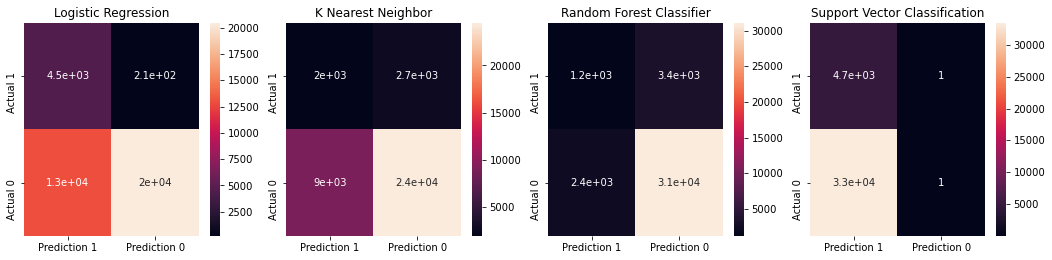

In [32]:
plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True)
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN, annot=True)
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfRF, annot=True)
plt.title('Random Forest Classifier')

plt.subplot(4,4,4)
sns.heatmap(dfSVC, annot=True)
plt.title('Support Vector Classification')

plt.show()